In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from sklearn.cluster import Birch
import time
from collections import Counter
from sklearn.cluster import DBSCAN
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import sample
import plotly.io as pio
!pip install -U kaleido
import kaleido
pio.renderers
#pio.renderers.default = "svg"
#from plotly.offline import plot, iplot, init_notebook_mode
#import plotly.graph_objs as go
#init_notebook_mode(connected=True)


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
df = pd.read_csv('Country.csv')
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
df.shape


(167, 10)

In [6]:
#data = df.drop(columns = 'country', inplace=True, axis = 1)


In [7]:
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe().transpose()


count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

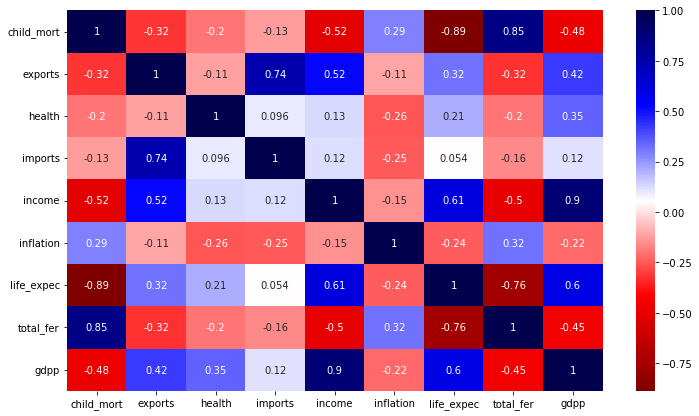

In [11]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True, cmap="seismic_r")
#plt.savefig('seismic',dpi=1000)
plt.show()

In [12]:
import kaleido
import plotly.express as px
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df,
                        locationmode='country names',
                        locations='country',
                         title=i+' per country (World)',color=i,color_continuous_scale="Reds"
                       )
    #fig.write_html(f"Interactive-plots_World_{i}.html")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

In [13]:
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df,
                        locationmode='country names',
                        locations='country',
                        color=i, title=i+' per country (Europe)',scope='europe',color_continuous_scale="Greens"
                       )
    #fig.write_html(f"Interactive-plots_Europe_{i}.html")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

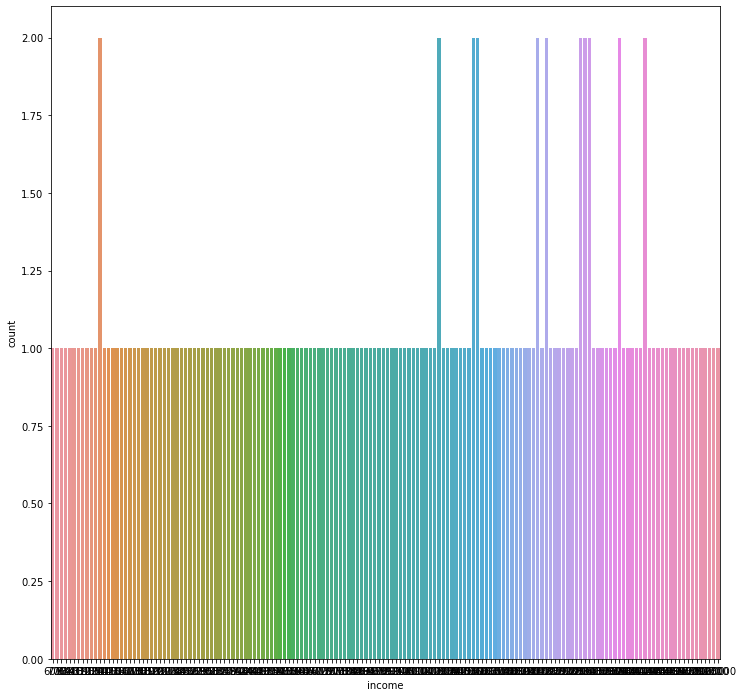

In [86]:
sns.countplot('income', data=df)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='exports', ylabel='count'>

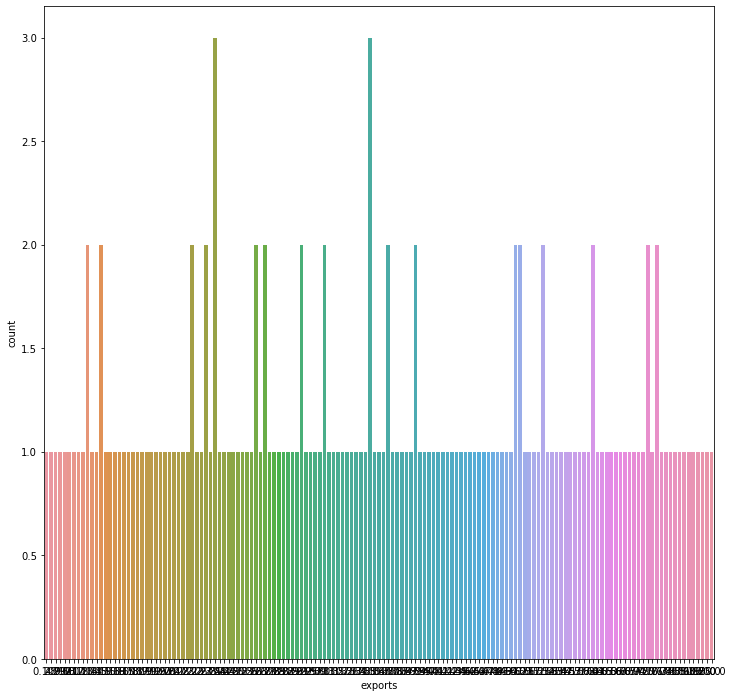

In [87]:
 sns.countplot('exports',data=df) # Count Plot of 'exports'

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='child_mort', ylabel='health'>

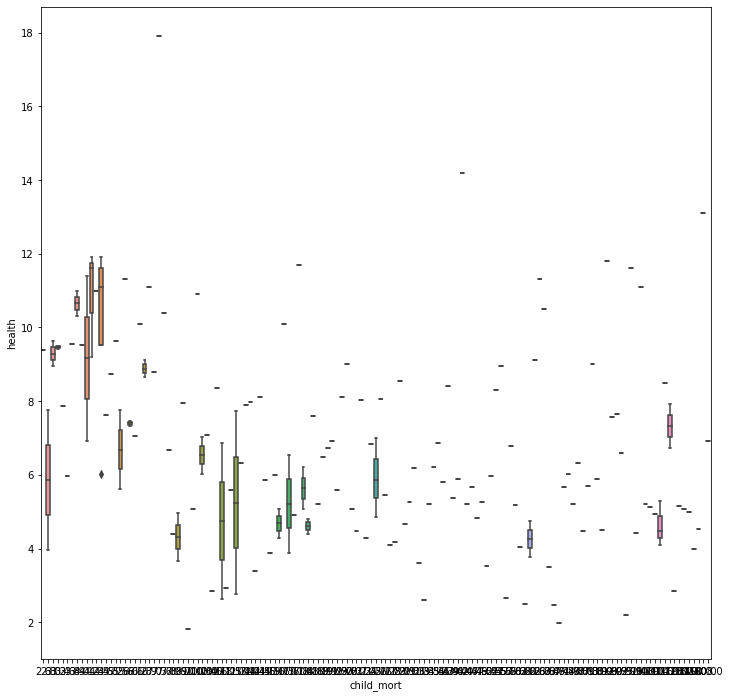

In [88]:
sns.boxplot('child_mort','health',data=df)

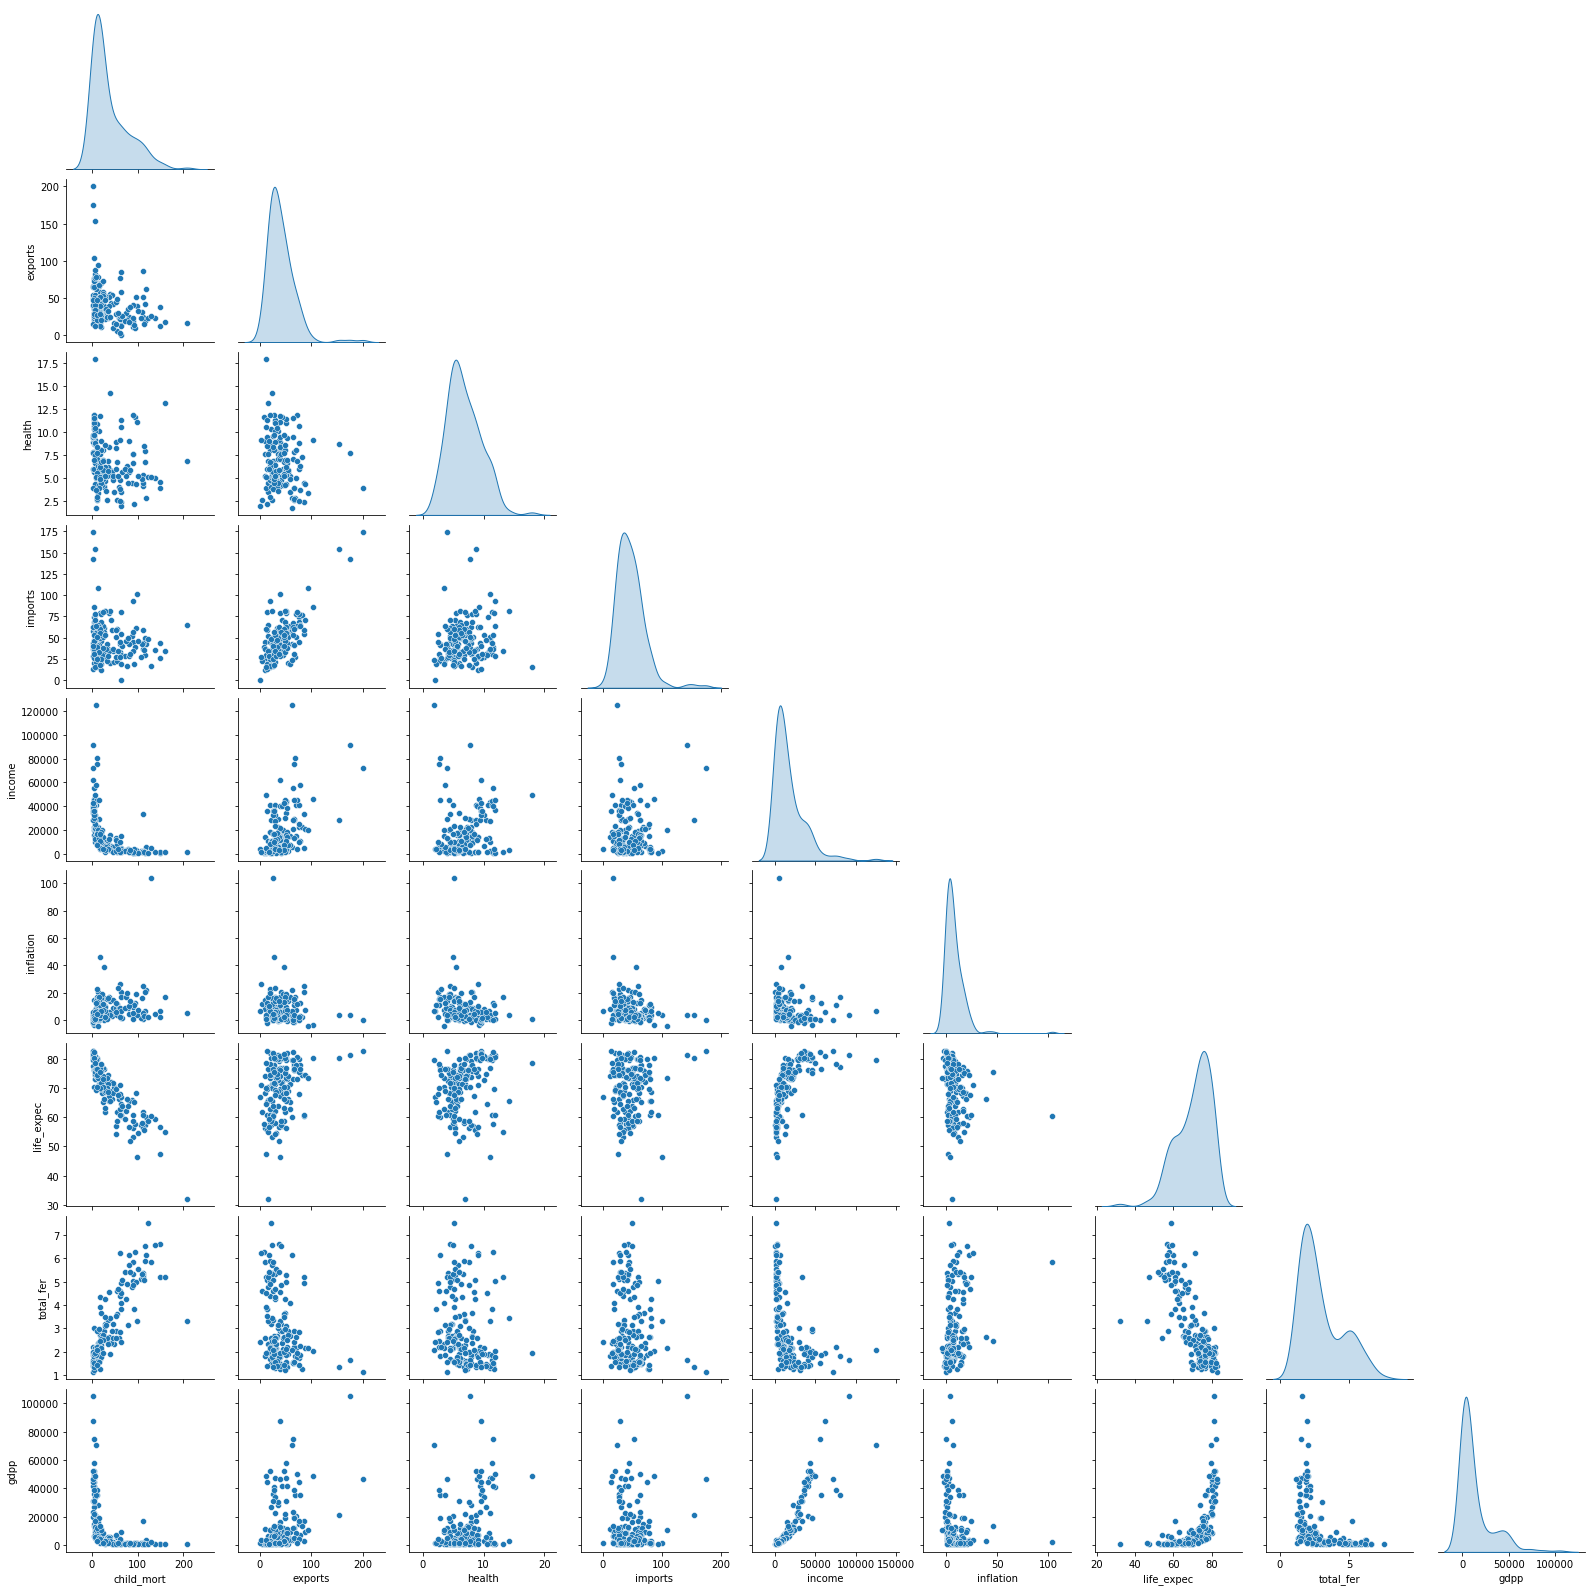

In [89]:
sns.pairplot(df, diag_kind = 'kde', corner = True)


/var/folders/vl/mgr_n9257hl7xf0p6rq44bm80000gn/T/ipykernel_18682/2986803871.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

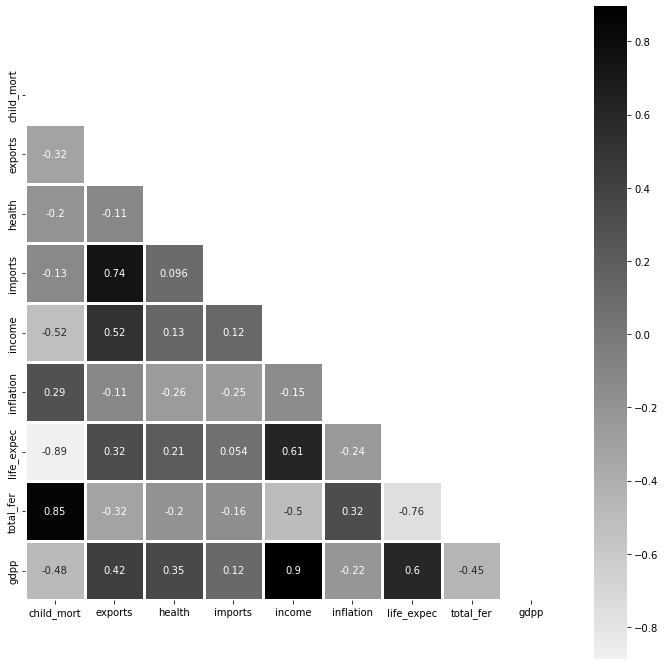

In [90]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool))
plt.rcParams['figure.figsize'] = 12, 12
cmap = sns.light_palette('black', as_cmap = True)
sns.heatmap(corr, mask = mask, center = 0, cmap = cmap, square = True, annot = True, linewidth = 3)

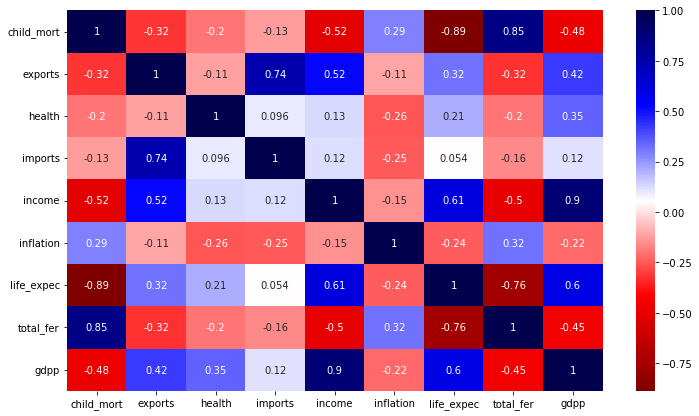

In [91]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True, cmap="seismic_r")
#plt.savefig('seismic',dpi=1000)
plt.show()

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])
df_scaled=pd.DataFrame(df_scaled,columns=df.iloc[:,1:].columns, index=df.index )
df_final=pd.concat([df.iloc[:,0],df_scaled],axis=1)
#df_scaled.to_csv('df_scaled.csv')
#df_final.to_csv('df_final.csv')
df_final

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  
0     0.157336   -1.619092   1.902882 -0.679180  
1    -0.312347    0.647866  -0.859973 -0.485623  
2     0.789274    0.670423  -0.038404 -0.465376  
3     1.387054   -1.179234   2.128151 -0.516268  
4    -0.601749    0.704258  -0.541946 -0.041817  
..         ...         ...        ...       ...  
162  -0.489784   -0.852161   0.365754 -0.546913  
163   3.616865    0.546361  -0.316678  0.029323  
164   0.409732    0.286958  -0.661206 -0.637754  
165   1.500916   -0.344633   1.140944 -0.637754  
166   0.590015   -2.092785   1.624609 -0.629546  

[167 rows x 10 columns]

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mac/opt/anaconda3/lib/python3.9/site-pa

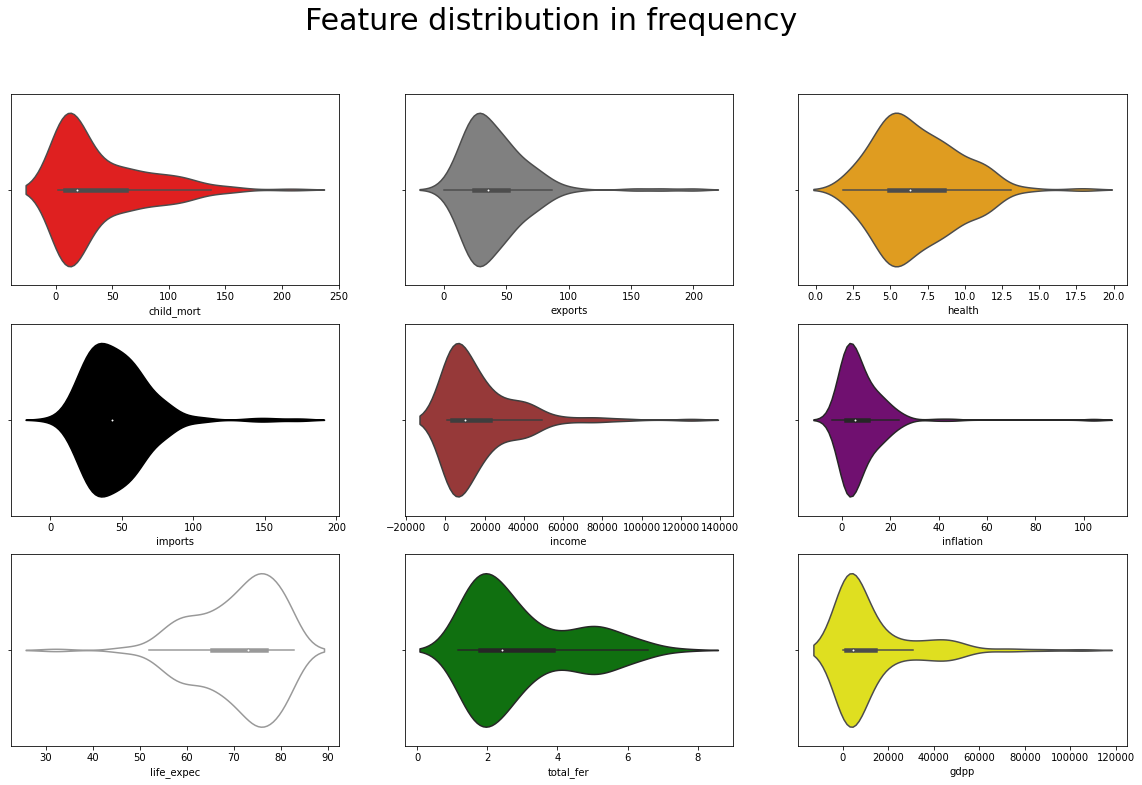

In [94]:
plt.figure(figsize=(20, 12))
plt.suptitle('Feature distribution in frequency',size=30)
plt.subplot(3,3,1)
sns.violinplot(df.child_mort,color='red')
plt.subplot(3,3,2)
sns.violinplot(df.exports,color='grey')
plt.subplot(3,3,3)
sns.violinplot(df.health,color='orange')
plt.subplot(3,3,4)
sns.violinplot(df.imports,color='black')
plt.subplot(3,3,5)
sns.violinplot(df.income,color='brown')
plt.subplot(3,3,6)
sns.violinplot(df.inflation,color='purple')
plt.subplot(3,3,7)
sns.violinplot(df.life_expec,color='white')
plt.subplot(3,3,8)
sns.violinplot(df.total_fer,color='green')
plt.subplot(3,3,9)
sns.violinplot(df.gdpp,color='yellow')
plt.show()
#plt.savefig('ViolinPlots_figures.png',dpi=300, facecolor='w')

Silhouettes score per cluster: {2: 0.7256314906273207, 3: 0.7003508054481694, 4: 0.6109297437247547, 5: 0.5734773443272871, 6: 0.589653373502461, 7: 0.5944253756384579, 8: 0.5964827694227415, 9: 0.5523907569989968} 
 


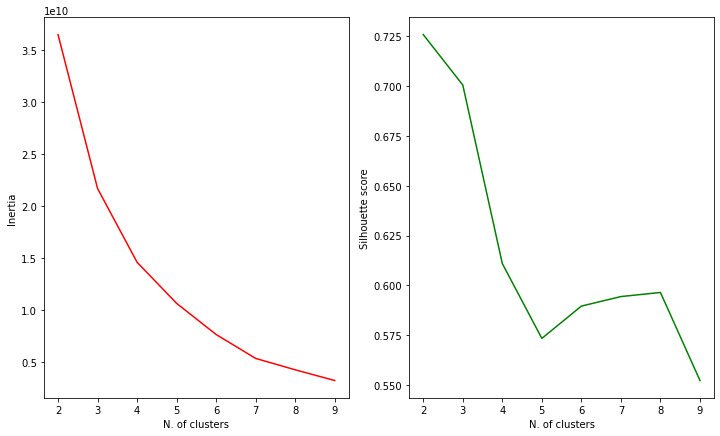

In [95]:
#You can try to apply also hopkins test for testing if the dataset is clusterable

silhouettes={}
inertia = []
range_n_clusters = list(range(2,10,1))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=60)
    kmeans.fit(df.iloc[:,1:])
    silhouette_avg = silhouette_score(df.iloc[:,1:], kmeans.labels_)
    inertia.append(kmeans.inertia_)
    silhouettes[num_clusters]=silhouette_avg
# plot the SSDs for each n_clusters
# ssd
plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
plt.plot(range_n_clusters,inertia,color='red')
plt.xlabel('N. of clusters')
plt.ylabel('Inertia')


plt.subplot(1,2,2)
plt.plot(silhouettes.keys(),silhouettes.values(),color='green')
plt.xlabel('N. of clusters')
plt.ylabel('Silhouette score')


#inertia: mean squared distance between each instance and its closest centroid
#plt.savefig('Kmeans_scores',dpi=300)
print(f'Silhouettes score per cluster: {silhouettes} \n ')
#plt.savefig('Kmeans_scores.svg',dpi=300,facecolor='w')
#plt.savefig('Kmeans_scores.png',dpi=300,facecolor='w')

In [96]:
kmeans = KMeans(n_clusters=4, random_state= 50)
kmeans.fit(df_scaled)
print(f' Labels: {kmeans.labels_}')

 Labels: [1 2 2 1 2 2 2 0 0 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 2 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 3 2 1 1 2 2 1 3 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 3 2 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state= 50)
kmeans.fit(df_scaled)
print(f' Labels: {kmeans.labels_}')

 Labels: [1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [111]:
df_labeled=pd.concat([df_final, pd.Series(kmeans.labels_,name='label')],axis=1)  #I take the initial dataset: 
#the one that it wasn't scaled
df_labeled

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  \
0     0.157336   -1.619092   1.902882 -0.679180   
1    -0.312347    0.647866  -0.859973 -0.485623   
2     0.789274    0.670423  -0.038404 -0.465376   
3     1.387054   -1.179234   2.128151 -0.516268   
4    -0.601749    0.704258  -0.541946 -0.041817   
..         ...         ...        ...       ...   
162  -0.489784   -0.852161   0.365754 -0.546913   
163   3.616865    0.546361  -0.316678  0.029323   
164   0.409732    0.286958  -0.661206 -0.637754   
165   1.500916   -0.344633   1.140944 -0.637754   
166   0.590015   -2.092785   1.624609 -0.629546   

    Hierarchical Clustering labels  label  
0                   Underdeveloped      1  
1                       Developing      2  
2                       Developing      2  
3                       Developing      1  
4                       Developing      2  
..                             ...    ...  
162                     Developing      2  
163                     Developing      2  
164                     Developing      2  
165                     Developing      1  
166                 Underdeveloped      1  

[167 rows x 12 columns]

In [114]:
df_labeled

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  \
0     0.157336   -1.619092   1.902882 -0.679180   
1    -0.312347    0.647866  -0.859973 -0.485623   
2     0.789274    0.670423  -0.038404 -0.465376   
3     1.387054   -1.179234   2.128151 -0.516268   
4    -0.601749    0.704258  -0.541946 -0.041817   
..         ...         ...        ...       ...   
162  -0.489784   -0.852161   0.365754 -0.546913   
163   3.616865    0.546361  -0.316678  0.029323   
164   0.409732    0.286958  -0.661206 -0.637754   
165   1.500916   -0.344633   1.140944 -0.637754   
166   0.590015   -2.092785   1.624609 -0.629546   

    Hierarchical Clustering labels  label  
0                   Underdeveloped      1  
1                       Developing      2  
2                       Developing      2  
3                       Developing      1  
4                       Developing      2  
..                             ...    ...  
162                     Developing      2  
163                     Developing      2  
164                     Developing      2  
165                     Developing      1  
166                 Underdeveloped      1  

[167 rows x 12 columns]

In [113]:
from sklearn.cluster import AgglomerativeClustering


In [101]:
hcluster = AgglomerativeClustering(n_clusters=3).fit_predict(df_scaled)
hcluster

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

In [107]:
df_final["Hierarchical Clustering labels"] = hcluster

df_final

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  \
0     0.157336   -1.619092   1.902882 -0.679180   
1    -0.312347    0.647866  -0.859973 -0.485623   
2     0.789274    0.670423  -0.038404 -0.465376   
3     1.387054   -1.179234   2.128151 -0.516268   
4    -0.601749    0.704258  -0.541946 -0.041817   
..         ...         ...        ...       ...   
162  -0.489784   -0.852161   0.365754 -0.546913   
163   3.616865    0.546361  -0.316678  0.029323   
164   0.409732    0.286958  -0.661206 -0.637754   
165   1.500916   -0.344633   1.140944 -0.637754   
166   0.590015   -2.092785   1.624609 -0.629546   

     Hierarchical Clustering labels  
0                                 2  
1                                 1  
2                                 1  
3                                 1  
4                                 1  
..                              ...  
162                               1  
163                               1  
164                               1  
165                               1  
166                               2  

[167 rows x 11 columns]

In [108]:
df_final["Hierarchical Clustering labels"].replace({2:"Underdeveloped", 1:"Developing", 0:"Developed"}, inplace = True)

df_final

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp Hierarchical Clustering labels  
0     0.157336   -1.619092   1.902882 -0.679180                 Underdeveloped  
1    -0.312347    0.647866  -0.859973 -0.485623                     Developing  
2     0.789274    0.670423  -0.038404 -0.465376                     Developing  
3     1.387054   -1.179234   2.128151 -0.516268                     Developing  
4    -0.601749    0.704258  -0.541946 -0.041817                     Developing  
..         ...         ...        ...       ...                            ...  
162  -0.489784   -0.852161   0.365754 -0.546913                     Developing  
163   3.616865    0.546361  -0.316678  0.029323                     Developing  
164   0.409732    0.286958  -0.661206 -0.637754                     Developing  
165   1.500916   -0.344633   1.140944 -0.637754                     Developing  
166   0.590015   -2.092785   1.624609 -0.629546                 Underdeveloped  

[167 rows x 11 columns]

In [115]:
from sklearn.decomposition import PCA

In [116]:
social_scores = ["child_mort", "health", "life_expec", "total_fer"]
economical_scores = ["exports", "imports", "income", "inflation", "gdpp"]

In [117]:
pca = PCA(n_components = 1)

In [118]:
pca_social = pca.fit_transform(X=df_final[social_scores])
pca_social = pd.DataFrame(data = pca_social, columns=["social_score"])

pca_economical = pca.fit_transform(X=df_final[economical_scores])
pca_economical = pd.DataFrame(data = pca_economical, columns=["economical_score"])

In [119]:
df_pca = pd.concat([pca_economical, pca_social, df_labeled[["country", "label"]]], axis = 1)
df_pca


economical_score  social_score              country  label
0           -1.432694      2.659640          Afghanistan      1
1           -0.601562     -1.134527              Albania      2
2           -0.820958     -0.365970              Algeria      2
3           -0.546098      3.294767               Angola      1
4            0.433170     -1.043757  Antigua and Barbuda      2
..                ...           ...                  ...    ...
162         -0.371873      0.664511              Vanuatu      2
163         -1.495388     -0.650940            Venezuela      2
164          0.323653     -0.745465              Vietnam      2
165         -1.414000      1.204119                Yemen      1
166         -1.160804      2.792151               Zambia      1

[167 rows x 4 columns]

In [122]:
df_pca = pd.concat([pca_economical, pca_social, df_labeled[["country", "Hierarchical Clustering labels", 
                                                          "label"]]], axis = 1)

In [123]:
df_final

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp Hierarchical Clustering labels  
0     0.157336   -1.619092   1.902882 -0.679180                 Underdeveloped  
1    -0.312347    0.647866  -0.859973 -0.485623                     Developing  
2     0.789274    0.670423  -0.038404 -0.465376                     Developing  
3     1.387054   -1.179234   2.128151 -0.516268                     Developing  
4    -0.601749    0.704258  -0.541946 -0.041817                     Developing  
..         ...         ...        ...       ...                            ...  
162  -0.489784   -0.852161   0.365754 -0.546913                     Developing  
163   3.616865    0.546361  -0.316678  0.029323                     Developing  
164   0.409732    0.286958  -0.661206 -0.637754                     Developing  
165   1.500916   -0.344633   1.140944 -0.637754                     Developing  
166   0.590015   -2.092785   1.624609 -0.629546                 Underdeveloped  

[167 rows x 11 columns]

<AxesSubplot:xlabel='economical_score', ylabel='social_score'>

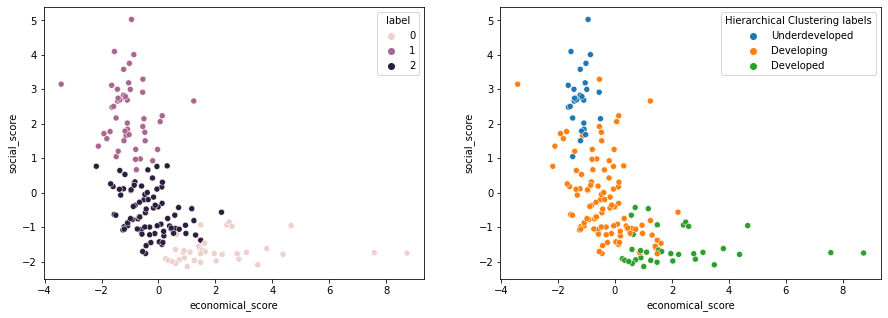

In [124]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x = df_pca["economical_score"], y = df_pca["social_score"], data = df_pca, hue = "label")

plt.subplot(1,2,2)
sns.scatterplot(x = df_pca["economical_score"], y = df_pca["social_score"], data = df_pca, hue = "Hierarchical Clustering labels")